# DryBeanDataset

The **XGBoost** and **Random Forest** models are employed for the classification of the DryBeanDataset, a tabular dataset representing various bean types. 

1. Ikhsan Assidiqie
2. Zharfan Dawud Harwiraputera
3. Helmi Wira Tahta Haikal

## Method Summary

1. **XGBOOST** 
Known for its efficiency and accuracy, XGBoost is a gradient boosting algorithm that sequentially builds multiple decision trees and optimizes their collective predictive power. It's particularly effective for tabular data classification, making it well-suited for discerning different types of beans in the DryBeanDataset.

2. **Random Forest** 
This model involves constructing multiple decision trees using random subsets of the training data. Each tree contributes to the final prediction, and the Random Forest model excels in handling complex datasets. In the context of DryBeanDataset, Random Forest proves valuable for accurate classification, leveraging the diversity of decision trees to enhance overall performance.

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [32]:
data = '../../data/raw/DryBeanDataset/Dry_Bean_Dataset.csv'

In [33]:
df = pd.read_csv(data, delimiter=';')

In [34]:
df = df.replace(',', '.', regex=True)

In [35]:
df.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

In [36]:
X = df.drop('Class', axis=1)
y = df['Class']

In [37]:
X.dtypes

Area                int64
Perimeter          object
MajorAxisLength    object
MinorAxisLength    object
AspectRation       object
Eccentricity       object
ConvexArea          int64
EquivDiameter      object
Extent             object
Solidity           object
roundness          object
Compactness        object
ShapeFactor1       object
ShapeFactor2       object
ShapeFactor3       object
ShapeFactor4       object
dtype: object

In [38]:
X[['Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']] = X[ ['Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']].astype(float)

In [39]:
X.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
dtype: object

In [40]:
df.shape

(13611, 17)

In [41]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.1781167,173.888747,1.197191424,0.549812187,28715,190.1410973,0.763922518,0.988855999,0.958027126,0.913357755,0.007331506,0.003147289,0.834222388,0.998723889,SEKER
1,28734,638.018,200.5247957,182.7344194,1.097356461,0.411785251,29172,191.2727505,0.783968133,0.984985603,0.887033637,0.953860842,0.006978659,0.003563624,0.909850506,0.998430331,SEKER
2,29380,624.11,212.8261299,175.9311426,1.209712656,0.562727317,29690,193.4109041,0.778113248,0.989558774,0.947849473,0.908774239,0.007243912,0.003047733,0.825870617,0.999066137,SEKER
3,30008,645.884,210.557999,182.5165157,1.153638059,0.498615976,30724,195.4670618,0.782681273,0.976695743,0.903936374,0.928328835,0.007016729,0.003214562,0.861794425,0.994198849,SEKER
4,30140,620.134,201.8478822,190.2792788,1.06079802,0.333679658,30417,195.896503,0.773098035,0.99089325,0.984877069,0.970515523,0.00669701,0.003664972,0.941900381,0.999166059,SEKER


In [42]:
X.shape

(13611, 16)

In [43]:
X.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Area             13611 non-null  int64 
 1   Perimeter        13611 non-null  object
 2   MajorAxisLength  13611 non-null  object
 3   MinorAxisLength  13611 non-null  object
 4   AspectRation     13611 non-null  object
 5   Eccentricity     13611 non-null  object
 6   ConvexArea       13611 non-null  int64 
 7   EquivDiameter    13611 non-null  object
 8   Extent           13611 non-null  object
 9   Solidity         13611 non-null  object
 10  roundness        13611 non-null  object
 11  Compactness      13611 non-null  object
 12  ShapeFactor1     13611 non-null  object
 13  ShapeFactor2     13611 non-null  object
 14  ShapeFactor3     13611 non-null  object
 15  ShapeFactor4     13611 non-null  object
 16  Class            13611 non-null  object
dtypes: int64(2), object(15)
memory 

In [45]:
df.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

In [46]:
X.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'],
      dtype='object')

In [47]:
if (df.isnull().sum() == 0).all():
    print(df.isnull().sum())
    print("\nClean data.")
else:
    print("Data contains null values")

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

Clean data.


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [50]:
X_train.shape, X_test.shape

((9119, 16), (4492, 16))

### Feature Engineering

In [51]:
X_train.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
9480,48233,837.447,323.237083,191.463072,1.688248,0.805695,48934,247.814775,0.695401,0.985675,0.864250,0.766666,0.006702,0.001428,0.587776,0.992312
6775,56733,923.164,363.198193,200.095054,1.815128,0.834555,57297,268.765137,0.815821,0.990157,0.836542,0.739996,0.006402,0.001184,0.547594,0.993953
5766,45666,870.017,350.539258,166.393795,2.106685,0.880159,46356,241.130166,0.613016,0.985115,0.758136,0.687883,0.007676,0.001060,0.473184,0.996849
227,34623,675.213,228.194371,193.503300,1.179279,0.530035,34965,209.960408,0.759576,0.990219,0.954318,0.920095,0.006591,0.002914,0.846574,0.998347
7113,60716,984.188,404.263088,192.452036,2.100591,0.879415,61532,278.039587,0.819291,0.986739,0.787693,0.687769,0.006658,0.000919,0.473026,0.993635


In [52]:
sta = StandardScaler()
X_train = sta.fit_transform(X_train)
X_test = sta.transform(X_test)

In [53]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [54]:
rfc_entropy_100 = RandomForestClassifier(criterion='entropy', random_state=100)

# Train the classifier on the training data
rfc_entropy_100.fit(X_train, y_train)

# Make predictions on the test data
y_pred_test_entropy_100 = rfc_entropy_100.predict(X_test)

# Print the classification report comparing the true labels (y_test) with the predicted labels (y_pred_test_entropy_100)
print("Random Forest with Entropy (Random State 100):")
print(classification_report(y_test, y_pred_test_entropy_100))

Random Forest with Entropy (Random State 100):
              precision    recall  f1-score   support

    BARBUNYA       0.94      0.91      0.92       450
      BOMBAY       1.00      0.99      1.00       178
        CALI       0.94      0.93      0.93       528
    DERMASON       0.90      0.92      0.91      1155
       HOROZ       0.97      0.95      0.96       638
       SEKER       0.95      0.94      0.95       664
        SIRA       0.87      0.87      0.87       879

    accuracy                           0.92      4492
   macro avg       0.94      0.93      0.93      4492
weighted avg       0.92      0.92      0.92      4492


In [55]:
# Create another RandomForestClassifier with the Gini Index as the splitting criterion and random_state set to 42
rfc_gini_42 = RandomForestClassifier(criterion='gini', random_state=42)

# Train the classifier on the training data
rfc_gini_42.fit(X_train, y_train)

# Make predictions on the test data
y_pred_test_gini_42 = rfc_gini_42.predict(X_test)

# Print the classification report comparing the true labels (y_test) with the predicted labels (y_pred_test_gini_42)
print("\nRandom Forest with Gini Index (Random State 42):")
print(classification_report(y_test, y_pred_test_gini_42))


Random Forest with Gini Index (Random State 42):
              precision    recall  f1-score   support

    BARBUNYA       0.94      0.90      0.92       450
      BOMBAY       1.00      0.99      1.00       178
        CALI       0.93      0.94      0.93       528
    DERMASON       0.90      0.93      0.91      1155
       HOROZ       0.96      0.95      0.96       638
       SEKER       0.94      0.94      0.94       664
        SIRA       0.88      0.87      0.88       879

    accuracy                           0.92      4492
   macro avg       0.94      0.93      0.93      4492
weighted avg       0.92      0.92      0.92      4492


In [56]:
# Create another RandomForestClassifier with entropy as the splitting criterion and random_state set to seed 123
rfc_entropy_123 = RandomForestClassifier(criterion='entropy', random_state=123)

# Train the classifier on the training data
rfc_entropy_123.fit(X_train, y_train)

# Make predictions on the test data
y_pred_test_entropy_123 = rfc_entropy_123.predict(X_test)

# Print the classification report comparing the true labels (y_test) with the predicted labels (y_pred_test_entropy_123)
print("\nRandom Forest with Entropy (Random State 123):")
print(classification_report(y_test, y_pred_test_entropy_123))


Random Forest with Entropy (Random State 123):
              precision    recall  f1-score   support

    BARBUNYA       0.94      0.91      0.92       450
      BOMBAY       1.00      0.99      1.00       178
        CALI       0.93      0.94      0.93       528
    DERMASON       0.90      0.92      0.91      1155
       HOROZ       0.97      0.95      0.96       638
       SEKER       0.95      0.94      0.94       664
        SIRA       0.87      0.88      0.87       879

    accuracy                           0.92      4492
   macro avg       0.94      0.93      0.93      4492
weighted avg       0.92      0.92      0.92      4492


In [57]:
rfc_entropy_100.feature_importances_

array([0.05468537, 0.11045021, 0.0928402 , 0.0874687 , 0.04591941,
       0.03339479, 0.09237001, 0.07083673, 0.00871363, 0.01512514,
       0.04217185, 0.08318531, 0.09433224, 0.07092904, 0.07334188,
       0.0242355 ])

In [58]:
rfc_entropy_123.feature_importances_

array([0.05041272, 0.11171383, 0.10465288, 0.08766833, 0.04581645,
       0.04240287, 0.09290195, 0.05927302, 0.00898014, 0.01546073,
       0.0450989 , 0.06472436, 0.10647007, 0.06008962, 0.07881908,
       0.02551505])

In [59]:
rfc_gini_42.feature_importances_

array([0.05155492, 0.10627347, 0.07394986, 0.08040893, 0.06041951,
       0.06391154, 0.07093318, 0.06328383, 0.01140378, 0.01925531,
       0.05292014, 0.09797342, 0.0905542 , 0.03860353, 0.08857761,
       0.02997676])

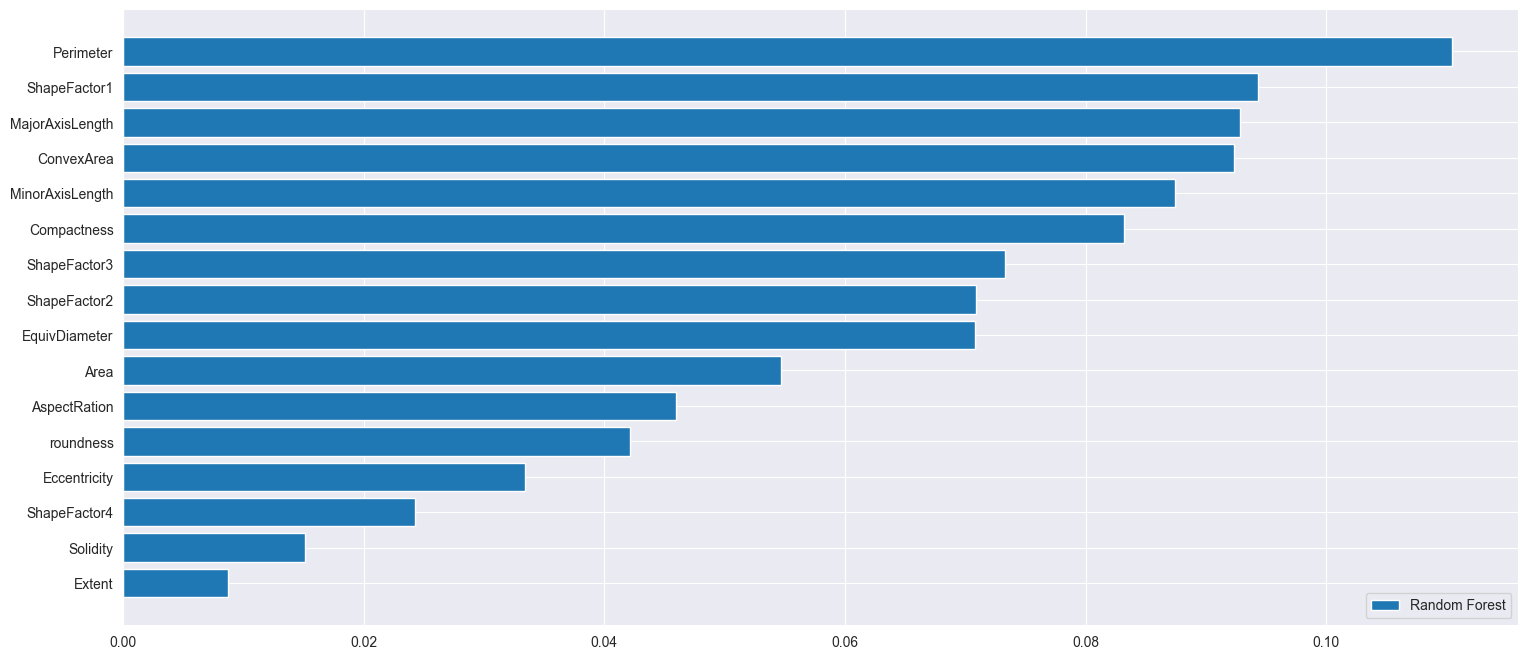

In [60]:
feature_importance = pd.DataFrame({'rfc':rfc_entropy_100.feature_importances_},index = df.drop(columns = ['Class']).columns)
feature_importance.sort_values('rfc',ascending = True,inplace = True)

index = np.arange(len(feature_importance))
fig, ax = plt.subplots(figsize = (18,8))
rfc_feature = ax.barh(index, feature_importance['rfc'], label = 'Random Forest')
ax.set(yticks = index , yticklabels = feature_importance.index)

ax.legend()
plt.show()

## Results and Analysis

Following the code execution above, the project outcomes will encompass model performance metrics, aided by visualizations and insights derived from the application of Random Forest on the DryBean Dataset.

## Conclusion

with the available results and our team’s analysis, we concluded that dry bean classification is an astounding success with all types of models having high percentages of precision and F1-score. Our greatest result could be seen in schema four using XGBoost with a precision score of 93%, followed closely by random forest schemas with 92%.